In [57]:
##displays all outputs of each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
##reading in batting files and adding season and team columns
##Red Sox
red_sox2022 = pd.read_csv('RedSoxBatting2022.csv')
red_sox2022['Season'] = 2022
red_sox2022['Team'] = 'Red Sox'

red_sox2023 = pd.read_csv('RedSoxBatting2023.csv')
red_sox2023['Season'] = 2023
red_sox2023['Team'] = 'Red Sox'

red_sox2024 = pd.read_csv('RedSoxBatting2024.csv')
red_sox2024['Season'] = 2024
red_sox2024['Team'] = 'Red Sox'

##Yankees
yankees2022 = pd.read_csv('YankeesBatting2022.csv')
yankees2022['Season'] = 2022
yankees2022['Team'] = 'Yankees'

yankees2023 = pd.read_csv('YankeesBatting2023.csv')
yankees2023['Season'] = 2023
yankees2023['Team'] = 'Yankees'

yankees2024 = pd.read_csv('YankeesBatting2024.csv')
yankees2024['Season'] = 2024
yankees2024['Team'] = 'Yankees'

##Twins
twins2022 = pd.read_csv('TwinsBatting2022.csv')
twins2022['Season'] = 2022
twins2022['Team'] = 'Twins'

twins2023 = pd.read_csv('TwinsBatting2023.csv')
twins2023['Season'] = 2023
twins2023['Team'] = 'Twins'

twins2024 = pd.read_csv('TwinsBatting2024.csv')
twins2024['Season'] = 2024
twins2024['Team'] = 'Twins'

##combining all into one
combined_bat = pd.concat([red_sox2022, red_sox2023, red_sox2024,
                          yankees2022, yankees2023, yankees2024,
                          twins2022, twins2023, twins2024]).reset_index(drop = True)

##reading in team history files
red_sox_hist = pd.read_csv('RedSoxHistory2022-24.csv')
yankees_hist = pd.read_csv('YankeesHistory2022-24.csv')
twins_hist = pd.read_csv('TwinsHistory2022-24.csv')

##combinging
combined_hist = pd.concat([red_sox_hist, yankees_hist, twins_hist]).reset_index(drop = True)

In [59]:
##aggregated version of data by sum
bat_agg = combined_bat[['Team', 'Season', 'WAR', 'R', 'BB']].groupby(['Team', 'Season']).sum()
bat_agg

WAR    R   BB
Team    Season                
Red Sox 2022    15.9  735  478
        2023    19.0  772  486
        2024    26.7  751  493
Twins   2022    24.8  696  518
        2023    26.0  778  594
        2024    17.2  742  473
Yankees 2022    36.0  807  620
        2023     8.6  673  557
        2024    30.4  815  672

In [60]:
##merging on all columns
bat_hist = pd.merge(bat_agg, combined_hist, how = 'left', left_on = ['Team', 'Season'], right_on = ['Tm', 'Year'])

##selecting columns for chart used later
bat_wl = bat_hist[['Tm', 'Year', 'WAR', 'R', 'BB', 'W']].groupby(['Tm', 'Year']).sum()
bat_wl

WAR    R   BB   W
Tm      Year                    
Red Sox 2022  15.9  735  478  78
        2023  19.0  772  486  78
        2024  26.7  751  493  81
Twins   2022  24.8  696  518  78
        2023  26.0  778  594  87
        2024  17.2  742  473  82
Yankees 2022  36.0  807  620  99
        2023   8.6  673  557  82
        2024  30.4  815  672  94

In [66]:
##new data frame to use to calculate ranks of stats
team_season_ranks = pd.DataFrame({'Team' : bat_hist['Tm'],
                                  'Season' : bat_hist['Year'],
                                  'WAR' : bat_hist['WAR'],
                                  'R' : bat_hist['R'],
                                  'BB' : bat_hist['BB'],
                                  'WinPer' : bat_hist['W-L%']})

##ranks of each indiviual stat
team_season_ranks['WAR_rank'] = team_season_ranks.WAR.rank(ascending = False, method = 'first')
team_season_ranks['R_rank'] = team_season_ranks.R.rank(ascending = False, method = 'first')
team_season_ranks['BB_rank'] = team_season_ranks.BB.rank(ascending = False, method = 'first')
team_season_ranks['WinPer_rank'] = team_season_ranks.WinPer.rank(ascending = False, method = 'first')
team_season_ranks

##Based on the data the higher win percentages have better ranks in all three categories
##It is possible to have an ok win percentage with high WAR and R
##high BBs can save a season from poor WAR and R
##In terms of which have the most ability to change the win percentage it would be WAR, R, and then BB

,Team,Season,WAR,R,BB,WinPer,WAR_rank,R_rank,BB_rank,WinPer_rank
0,Red Sox,2022,15.9,735,478,0.481,8.0,7.0,8.0,7.0
1,Red Sox,2023,19.0,772,486,0.481,6.0,4.0,7.0,8.0
2,Red Sox,2024,26.7,751,493,0.500,3.0,5.0,6.0,6.0
3,Twins,2022,24.8,696,518,0.481,5.0,8.0,5.0,9.0
4,Twins,2023,26.0,778,594,0.537,4.0,3.0,3.0,3.0
5,Twins,2024,17.2,742,473,0.506,7.0,6.0,9.0,4.0
6,Yankees,2022,36.0,807,620,0.611,1.0,2.0,2.0,1.0
7,Yankees,2023,8.6,673,557,0.506,9.0,9.0,4.0,5.0
8,Yankees,2024,30.4,815,672,0.580,2.0,1.0,1.0,2.0


Text(0.5, 0, 'Team and Season')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'MLB Team Totals - Red Sox, Yankees, & Twins')

<Figure size 640x480 with 0 Axes>

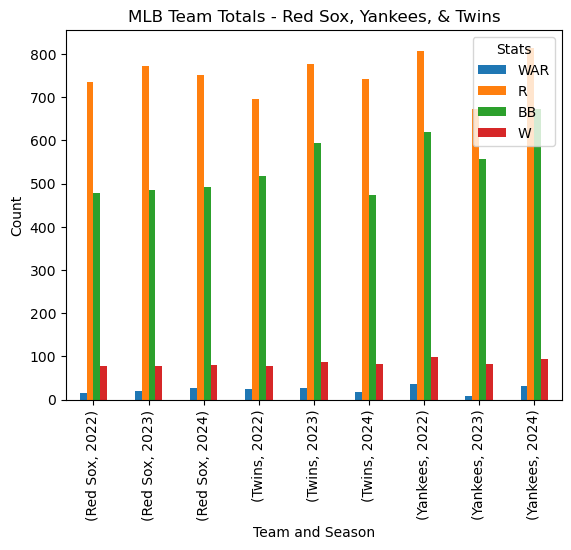

In [63]:
##chart 
fig = plt.figure()

##bar chart using data
ax = bat_wl.plot(kind = 'bar')

##labels
ax.set_xlabel('Team and Season')
ax.set_ylabel('Count')
ax.set_title('MLB Team Totals - Red Sox, Yankees, & Twins')

##formating legend and setting location
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc = 'upper right', title = 'Stats')